In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# select features

In [7]:
#Set target, features and feature_names.

X = df[["koi_impact","koi_time0bk","koi_period","koi_slogg","koi_depth","koi_prad","koi_insol","koi_model_snr","koi_tce_plnt_num","koi_steff"]]
# y = df["koi_disposition"].values.reshape(-1, 1)
# X = df[["koi_period","koi_impact"]]

y = df["koi_disposition"]

# create a train test splite

In [8]:
#divide the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train.head()

,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
8017,0.697,131.785670,0.806277,4.471,70.8,0.89,4119.09,37.9,1.0,6122.0
1233,0.966,355.515064,3.582077,4.422,1534.4,5.33,604.27,138.4,1.0,6109.0
2592,0.944,134.473160,5.060923,4.492,71.6,0.98,234.93,15.7,1.0,5637.0
4770,0.235,135.854534,8.480304,3.946,83115.0,65.00,1210.22,5219.5,1.0,7059.0
6632,0.698,136.183300,4.994716,3.706,53.0,2.20,2836.06,14.1,1.0,6409.0


In [10]:
#second model
X2 = df.drop(columns=["koi_disposition"])

In [11]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=23)

In [12]:
X2_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8703,0,1,0,0,0.843651,4.300000e-08,-4.300000e-08,131.947811,0.000042,-0.000042,...,-141.0,4.578,0.084,-0.052,0.695,0.067,-0.067,297.67096,41.875980,13.826
4798,0,0,0,0,3.806759,4.889000e-05,-4.889000e-05,133.749200,0.009240,-0.009240,...,-82.0,4.040,0.182,-0.112,1.797,0.295,-0.406,297.58313,41.952431,15.767
1555,0,0,0,0,2.466071,3.827000e-06,-3.827000e-06,132.320970,0.001290,-0.001290,...,-186.0,4.529,0.048,-0.192,0.884,0.259,-0.086,296.05042,42.113239,15.601
7638,0,1,0,0,5.077747,7.970000e-07,-7.970000e-07,134.635390,0.000130,-0.000130,...,-185.0,4.235,0.186,-0.140,1.271,0.268,-0.268,296.31641,42.433510,12.847
1527,0,0,0,0,13.727103,4.068000e-05,-4.068000e-05,138.744730,0.002260,-0.002260,...,-80.0,4.017,0.033,-0.030,1.693,0.115,-0.094,282.97897,40.784351,12.119


# Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [13]:
#scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
X.shape

(8744, 10)

In [15]:
y.shape

(8744,)

In [16]:
X2_scaler = StandardScaler().fit(X2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

In [17]:
X2.shape

(8744, 40)

# Train the Model

In [18]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train_scaled,y_train)
# model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.5021347971942666
Testing Data Score: 0.505032021957914


In [20]:
# create the second SVC model, try different kernels
model2 = SVC(kernel='linear')
# model2 = SVC(kernel='rbf')
model2.fit(X2_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
print(f"Training Data Score: {model2.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8909728575785301
Testing Data Score: 0.8879231473010064


In [22]:
model3 = SVC(kernel='rbf')
model3.fit(X2_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
print(f"Training Data Score: {model3.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8882281183287588
Testing Data Score: 0.87419945105215


In [24]:
model4 = SVC(kernel='poly')
model4.fit(X2_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [25]:
print(f"Training Data Score: {model4.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model4.score(X2_test_scaled, y_test)}")

Training Data Score: 0.8098505641964013
Testing Data Score: 0.8019213174748399


# Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.497, total=   2.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.497, total=   2.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.497, total=   1.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.497, total=   2.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.497, total=   2.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.497, total=   2.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.497, total=   2.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.497, total=   2.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.497, total=   2.2s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.49695028972247635


In [29]:
# train X2 with gridsearch
grid.fit(X2_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.690, total=   5.1s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.698, total=   5.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.692, total=   4.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.808, total=   3.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.826, total=   3.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.827, total=   3.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.819, total=   2.6s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.838, total=   3.2s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.844, total=   3.4s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.005}
0.8860933211344922


In [31]:
# model2
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [32]:
grid.fit(X2_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.879, total=   1.7s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.895, total=   1.4s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.890, total=   2.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.879, total=   2.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.895, total=   1.6s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.890, total=   2.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.879, total=   2.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.895, total=   1.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.890, total=   1.8s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  4.6min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [33]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.8879231473010064


In [34]:
# further refine model2
param_grid = {'C': [3, 5, 7],
              'gamma': [0.0001, 0.0002, 0.00009]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [35]:
grid.fit(X2_train_scaled,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=3, gamma=0.0001 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=3, gamma=0.0001, score=0.881, total=   2.1s
[CV] C=3, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ................... C=3, gamma=0.0001, score=0.892, total=   1.6s
[CV] C=3, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ................... C=3, gamma=0.0001, score=0.892, total=   1.7s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.881, total=   2.0s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.892, total=   1.8s
[CV] C=3, gamma=0.0002 ...............................................
[CV] ................... C=3, gamma=0.0002, score=0.892, total=   1.9s
[CV] C=3, gamma=9e-05 ................................................
[CV] .................... C=3, gamma=9e-05, score=0.881, total=   2.2s
[CV] C=3, gamma=9e-05 ................................................
[CV] .................... C=3, gamma=9e-05, score=0.892, total=   1.6s
[CV] C=3, gamma=9e-05 ................................................
[CV] .................... C=3, gamma=9e-05, score=0.892, total=   1.9s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [3, 5, 7], 'gamma': [0.0001, 0.0002, 9e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 3, 'gamma': 0.0001}
0.888380603842635


In [37]:
# further refine model2
param_grid = {'C': [0.1, 1, 2],
              'gamma': [0.0001, 0.0002, 0.00009]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [38]:
grid.fit(X2_train_scaled,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=0.0001 .............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.1, gamma=0.0001, score=0.872, total=   0.9s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.890, total=   0.9s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.883, total=   1.0s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.872, total=   0.9s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.890, total=   1.0s
[CV] C=0.1, gamma=0.0002 .............................................
[CV] ................. C=0.1, gamma=0.0002, score=0.883, total=   1.0s
[CV] C=0.1, gamma=9e-05 ..............................................
[CV] .................. C=0.1, gamma=9e-05, score=0.872, total=   0.9s
[CV] C=0.1, gamma=9e-05 ..............................................
[CV] .................. C=0.1, gamma=9e-05, score=0.890, total=   1.0s
[CV] C=0.1, gamma=9e-05 ..............................................
[CV] .................. C=0.1, gamma=9e-05, score=0.883, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   37.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 2], 'gamma': [0.0001, 0.0002, 9e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 2, 'gamma': 0.0001}
0.888380603842635


In [40]:
# Make predictions with the hypertuned model
predictions = grid.predict(X2_test_scaled)

In [41]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE","FALSE POSITIVE","CONFIRMED"]))

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.70      0.76       526
FALSE POSITIVE       0.76      0.86      0.81       561
     CONFIRMED       0.98      1.00      0.99      1099

      accuracy                           0.89      2186
     macro avg       0.86      0.85      0.85      2186
  weighted avg       0.89      0.89      0.89      2186



In [42]:
# next try KNN classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k: 1, Train/Test Score: 1.000/0.817
k: 3, Train/Test Score: 0.910/0.833
k: 5, Train/Test Score: 0.888/0.832
k: 7, Train/Test Score: 0.875/0.837
k: 9, Train/Test Score: 0.873/0.833
k: 11, Train/Test Score: 0.871/0.833
k: 13, Train/Test Score: 0.864/0.834
k: 15, Train/Test Score: 0.860/0.831
k: 17, Train/Test Score: 0.855/0.834
k: 19, Train/Test Score: 0.857/0.834


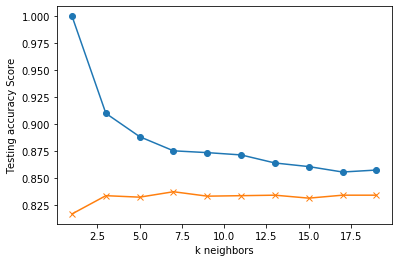

In [54]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train_scaled, y_train)
    train_score = knn.score(X2_train_scaled, y_train)
    test_score = knn.score(X2_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [57]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X2_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X2_test, y_test))

k=9 Test Acc: 0.661


# support vector machine

In [58]:
# Dependencies for SVM model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [59]:
# Support Vector Machine Linear Classifier
model = SVC(kernel='linear')

In [60]:
# Fitting the data into the model
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
# Save the prediction by the test data
predictions = model.predict(X_test_scaled)

In [62]:
# Check accuracy rate of  the model
print(classification_report(y_test, predictions,
                           target_names=['Negative', 'Positive', 'False Positive']))

                precision    recall  f1-score   support

      Negative       0.00      0.00      0.00       526
      Positive       0.00      0.00      0.00       561
False Positive       0.50      1.00      0.67      1099

      accuracy                           0.50      2186
     macro avg       0.17      0.33      0.22      2186
  weighted avg       0.25      0.50      0.34      2186



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
# Check the score of the dependent variable using the decision function
y_score = model.decision_function(X_train)
print(y_score)

[[-0.22826055  2.23130409  0.97118273]
 [-0.22184761  1.07320243  2.21026458]
 [-0.22688422  1.04370995  2.22149402]
 ...
 [-0.22587961  1.02442505  2.22306912]
 [-0.22659351  1.02169844  2.22415935]
 [ 2.33006726  0.67238504 -0.3258875 ]]
